# Завдання 1
Імпортуємо дані

In [10]:
import pandas as pd

# load training data
df = pd.read_csv('Skin_NonSkin.csv')
df.head()

,b,g,r,y
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


Візуалізуємо перший клас

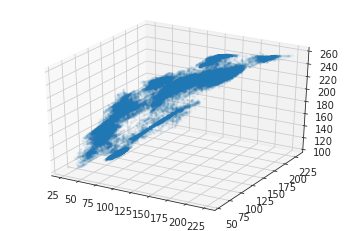

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

only1 = df[df['y'] == 1]
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(only1['b'], only1['g'], only1['r'], cmap="Set2_r", s=3, alpha=0.05)

Візуалізуємо другий клас

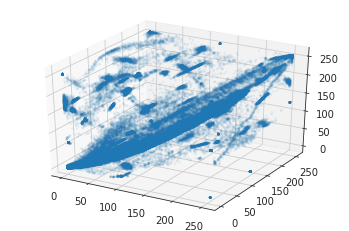

In [12]:
only2 = df[df['y'] == 2]
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(only2['b'], only2['g'], only2['r'], cmap="Set2_r", s=3, alpha=0.05)

## Metric=uniform

In [13]:
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# creating odd list of K for KNN
neighbors = list(range(1, 26, 2))

# empty list that will hold cv scores
cv_scores = [0]*len(neighbors)
final_scores = [0]*len(neighbors)

# create design matrix X and target vector y
X = np.array(df[['b', 'g', 'r']])  # end index is exclusive
y = np.array(df['y'])    # another way of indexing a pandas df

iter_count = 10
for _ in range(iter_count):
    # split into train and test
    X_train, \
    X_test, \
    y_train, \
    y_test = train_test_split(X, y, test_size=0.25)

    # perform cross validation
    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k, n_jobs=4)
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy', n_jobs=4)
        cv_scores[i] += (scores.mean())
        knn.fit(X_train, y_train)
        final_scores[i] += accuracy_score(y_test, knn.predict(X_test))

Середня помилка класифікації при тренуванні за допомогою кросвалідації та гіперпараметр з найменшою помилкою з усіх.

The optimal number of neighbors is 3


Text(0, 0.5, 'Misclassification Error')

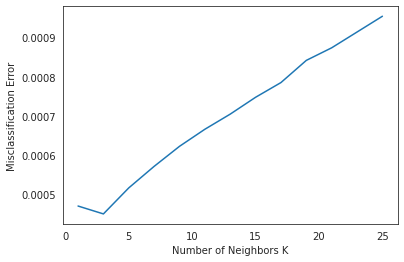

In [14]:
cv_scores = [v /iter_count for v in cv_scores]
final_scores = [v / iter_count for v in final_scores]

# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")

Середня помилка розпізнавання тестових даних.

Text(0, 0.5, 'Misclassification Error')

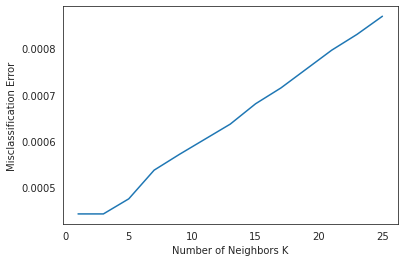

In [15]:
# plot accuracy error vs k
plt.plot(neighbors, [1 - x for x in final_scores])
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")

## Metric=distance

In [19]:
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# creating odd list of K for KNN
neighbors = list(range(1, 26, 2))

# empty list that will hold cv scores
cv_scores = [0]*len(neighbors)
final_scores = [0]*len(neighbors)

# create design matrix X and target vector y
X = np.array(df[['b', 'g', 'r']])  # end index is exclusive
y = np.array(df['y'])    # another way of indexing a pandas df

iter_count = 10
for _ in range(iter_count):
    # split into train and test
    X_train, \
    X_test, \
    y_train, \
    y_test = train_test_split(X, y, test_size=0.25)

    # perform cross validation
    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(weights='distance', n_neighbors=k, n_jobs=4)
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy', n_jobs=4)
        cv_scores[i] += (scores.mean())
        knn.fit(X_train, y_train)
        final_scores[i] += accuracy_score(y_test, knn.predict(X_test))

Середня помилка класифікації при тренуванні за допомогою кросвалідації та гіперпараметр з найменшою помилкою з усіх.

The optimal number of neighbors is 3


Text(0, 0.5, 'Misclassification Error')

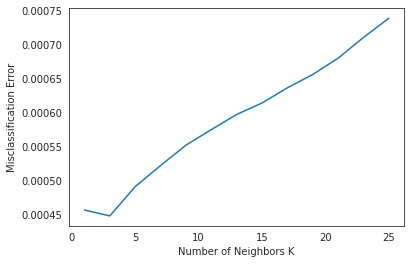

In [17]:
cv_scores = [v /iter_count for v in cv_scores]
final_scores = [v / iter_count for v in final_scores]

# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")

Середня помилка розпізнавання тестових даних.

Text(0, 0.5, 'Misclassification Error')

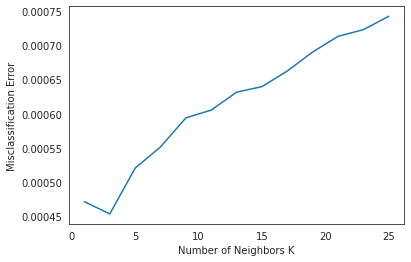

In [18]:
# plot accuracy error vs k
plt.plot(neighbors, [1 - x for x in final_scores])
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")

## Приписка
Я намагався зробити якомога точнішу кросвалідацію (LOO),
але даних настільки багато, що вона не могла закінчитися навіть для одного гіперпараметра годинами,
тому я не до кінця впевнений у тому, що саме параметр 3 найоптимальніший, іноді вибірка
може розбитися так, що 1 стає кращим значенням.

Також загалом можна вважати, що KNN зі зваженими сусідами (хах), показав себе трохи краще, помилка розпізнавання у 2 рази нижча,
хоча вона і так вже достаньо низька.